# diauxic_growth

In [1]:
from __future__ import absolute_import, print_function, division
import os
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import cobra
import roadrunner

from IPython.display import display, HTML

import sbmlutils
from sbmlutils import dfba
from sbmlutils.dfba.simulator import simulate_dfba
from sbmlutils.dfba import utils
from sbmlutils.dfba import analysis

analysis.set_matplotlib_parameters()

print('sbmlutils:', sbmlutils.__version__)
print('cobra:', cobra.__version__)
print('roadrunner:', roadrunner.__version__)

print(os.getcwd())

sbmlutils: 0.1.7a2
cobra: 0.9.1
roadrunner: 1.4.24
/home/mkoenig/git/dfba/models/diauxic_growth


## Simulation settings

In [2]:
model_id = "diauxic_growth"
tend = 15.0
dt = 0.01

In [3]:
# load data
Varma1994_Fig7 = pd.read_csv('./data/Varma1994_Fig7.csv', sep='\t')

In [4]:
def plot_results(df, mid):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    kwargs = {}
    for ax in (ax1, ax2):
        ax.plot(df.time, df['[Ac]'], color='darkred', label="Ac", **kwargs)
        ax.plot(df.time, df['[Glcxt]'], color='darkblue', label="Glcxt", **kwargs)
        ax.plot(df.time, df['[O2]'], color='darkgreen', label="O2", **kwargs)
    # data
    inds = Varma1994_Fig7.substance == 'acetate'    
    ax1.scatter(Varma1994_Fig7.time[inds], Varma1994_Fig7.value[inds], color='darkred', label="Ac data")
    inds = Varma1994_Fig7.substance == 'glucose'
    ax1.scatter(Varma1994_Fig7.time[inds], Varma1994_Fig7.value[inds], color='darkblue', label="Glcxt data")

    for ax in (ax3, ax4):
        ax.plot(df.time, df['[X]'], color='black', label="X biomass", **kwargs)
    # data
    inds = Varma1994_Fig7.substance == 'cell_density'
    ax3.scatter(Varma1994_Fig7.time[inds], Varma1994_Fig7.value[inds], color='black', label="X data")
        
    ax2.set_yscale('log')
    ax2.set_ylim([10E-5, 15])
    ax4.set_yscale('log')

    for ax in (ax1, ax2):
        ax.set_ylabel('Concentrations [mM]')

    for ax in (ax3, ax4):
        ax.set_ylabel('Biomass [g/l]')

    for ax in (ax1, ax2):
        ax.set_title(mid)
        ax.set_xlabel('time [h]')
    
    for ax in (ax1, ax2, ax3, ax4):
        ax.legend()
        ax.set_xlim(0, 13)
    plt.show()
    return fig

## mk_model

./mk/v13/diauxic_top.xml
diauxic_growth_mk_v13-sbmlutils_dt0.01_tend15.0

Simulation time     : 10.056 [s]
Total time          : 10.473 [s]
Overhead time       : 0.417 [s] (4.0 %)



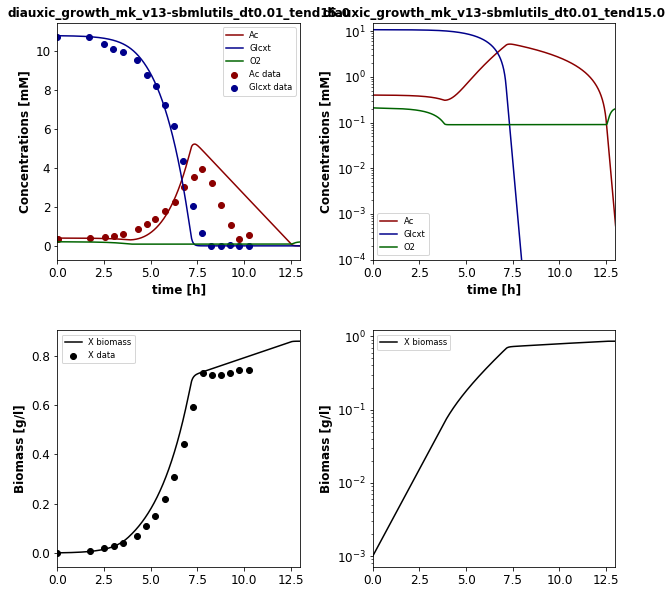

,time,[Ac],[Glcxt],[O2],[X],[dummy_S],[fba__Ac],[fba__Glcxt],[fba__O2],[fba__X],...,lb_EX_O2,lb_EX_X,pEX_Ac,pEX_Glcxt,pEX_O2,pEX_X,ub_EX_Ac,ub_EX_Glcxt,ub_EX_O2,ub_EX_X
0.00,0.00,4.000000e-01,1.080000e+01,0.210000,0.001000,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533756,-9.986130,-15.0,1.094515,1000.0,1000.0,1000.0,1000.0
0.01,0.01,3.999846e-01,1.079990e+01,0.209855,0.001011,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533756,-9.986130,-15.0,1.094515,1000.0,1000.0,1000.0,1000.0
0.02,0.02,3.999690e-01,1.079980e+01,0.209719,0.001022,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533757,-9.986130,-15.0,1.094515,1000.0,1000.0,1000.0,1000.0
0.03,0.03,3.999532e-01,1.079970e+01,0.209591,0.001033,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533757,-9.986130,-15.0,1.094514,1000.0,1000.0,1000.0,1000.0
0.04,0.04,3.999373e-01,1.079959e+01,0.209470,0.001045,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533757,-9.986130,-15.0,1.094514,1000.0,1000.0,1000.0,1000.0
0.05,0.05,3.999212e-01,1.079949e+01,0.209357,0.001056,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533757,-9.986130,-15.0,1.094514,1000.0,1000.0,1000.0,1000.0
0.06,0.06,3.999049e-01,1.079938e+01,0.209250,0.001068,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533757,-9.986130,-15.0,1.094514,1000.0,1000.0,1000.0,1000.0
0.07,0.07,3.998884e-01,1.079927e+01,0.209149,0.001080,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533758,-9.986129,-15.0,1.094514,1000.0,1000.0,1000.0,1000.0
0.08,0.08,3.998717e-01,1.079916e+01,0.209054,0.001092,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533758,-9.986129,-15.0,1.094514,1000.0,1000.0,1000.0,1000.0
0.09,0.09,3.998549e-01,1.079906e+01,0.208964,0.001104,0.0,0.0,0.0,0.0,0.0,...,-15.000000,-10.0,-1.533758,-9.986129,-15.0,1.094514,1000.0,1000.0,1000.0,1000.0


In [5]:
version_mk = 'v13'
sbml_mk = './mk/{}/diauxic_top.xml'.format(version_mk)
mid_mk = '{}_mk_{}-sbmlutils_dt{}_tend{}'.format(model_id, version_mk, dt, tend)
print(sbml_mk)
print(mid_mk)

# run simulation 
df_mk, dfba_model_mk, dfba_simulator_mk = simulate_dfba(sbml_mk, tend=tend, dt=dt)

# figures
fig = plot_results(df_mk, mid_mk)
fig.savefig('./{}.png'.format(mid_mk), bbox_inches='tight')
fig.savefig('./{}.pdf'.format(mid_mk), bbox_inches='tight')

# results
df_mk.to_csv('./{}.csv'.format(mid_mk))
display(df_mk)

## lw model

./lw/v4/growth_top.xml
diauxic_growth_lw_v4-sbmlutils_dt0.01_tend15.0


cobra/io/sbml3.py:259 UserWarning: loading SBML model without fbc:strict="true"



Simulation time     : 10.111 [s]
Total time          : 10.510 [s]
Overhead time       : 0.399 [s] (3.8 %)



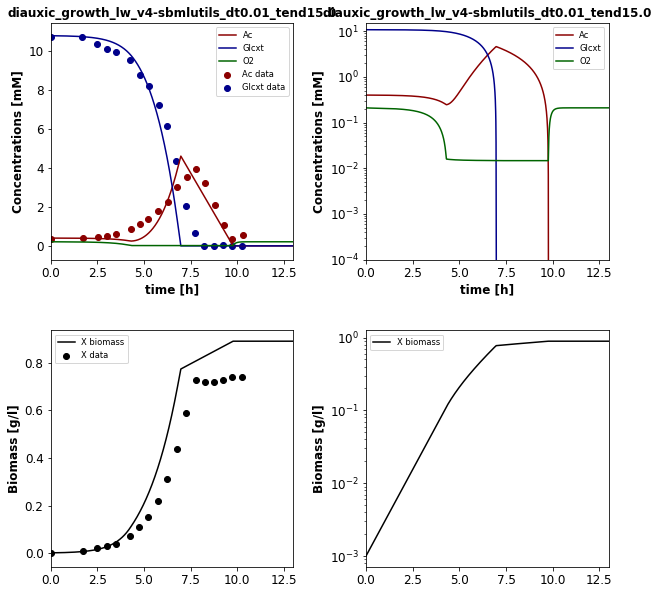

,time,[Ac],[C1__Ac],[C1__Glcxt],[C1__O2],[C1__X],[Glcxt],[O2],[X],[dummy],...,a_uptake_max,a_uptake_min,dt,g_rate_uptake,g_uptake_max,g_uptake_min,o_rate_uptake,o_uptake_max,o_uptake_min,x_rate_growth
0.00,0.00,0.400000,0.0,0.0,0.0,0.0,10.800000,0.210000,0.001000,0.0,...,1000.0,-1000.0,0.01,9.98613,9.98613,0.0,15.0,15.0,0.0,1.094515
0.01,0.01,0.399985,0.0,0.0,0.0,0.0,10.799900,0.209855,0.001011,0.0,...,1000.0,-1000.0,0.01,9.98613,9.98613,0.0,15.0,15.0,0.0,1.094515
0.02,0.02,0.399969,0.0,0.0,0.0,0.0,10.799798,0.209719,0.001022,0.0,...,1000.0,-1000.0,0.01,9.98613,9.98613,0.0,15.0,15.0,0.0,1.094515
0.03,0.03,0.399953,0.0,0.0,0.0,0.0,10.799695,0.209591,0.001033,0.0,...,1000.0,-1000.0,0.01,9.98613,9.98613,0.0,15.0,15.0,0.0,1.094514
0.04,0.04,0.399937,0.0,0.0,0.0,0.0,10.799592,0.209470,0.001045,0.0,...,1000.0,-1000.0,0.01,9.98613,9.98613,0.0,15.0,15.0,0.0,1.094514


In [6]:
version_lw = 'v4'
sbml_lw = './lw/{}/growth_top.xml'.format(version_lw)
mid_lw = '{}_lw_{}-sbmlutils_dt{}_tend{}'.format(model_id, version_lw, dt, tend)
print(sbml_lw)
print(mid_lw)

# run simulation 
df_lw, dfba_model_lw, dfba_simulator_lw = simulate_dfba(sbml_lw, tend=tend, dt=dt)

# figures 
fig = plot_results(df_lw, mid_lw)
fig.savefig('./{}.png'.format(mid_lw), bbox_inches='tight')
fig.savefig('./{}.pdf'.format(mid_lw), bbox_inches='tight')

# results
df_lw.to_csv('./{}.csv'.format(mid_lw))
display(df_lw.head())